In [35]:
%matplotlib inline

In [101]:
from astropy.table import Table, vstack, Column
import matplotlib.pyplot as plt
import numpy as np

In [103]:
plotpar = {'axes.labelsize': 17,
           'font.size': 12,
           'legend.fontsize': 17,
           'xtick.labelsize': 17,
           'ytick.labelsize': 17,
           'text.usetex': False}
plt.rcParams.update(plotpar)

In [105]:
tbl = Table.read('../../catalogs/Combined/main_non_rep_garchive.vot')
tbl

main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f
,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,
int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64
1,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,1.2977159,0,0,1,0
2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,1.3819181,0,1,1,0
3,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1.4623499,1,0,1,0
4,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,9.759859,1,0,1,0
5,2805045756653326080,0.32,1.7,0.33,12.63954,24.81658,1.538,Newton17,--,,--,--,40,66.7255813106135,205.82779,203.42839500687333,-31.33633841725112,11.240654,2.7810097,7.129615,1.0481054,1.5382388,1,1,0,0
6,327944328126649856,0.11,0.28,0.14,34.29474,35.44122,1.209,Newton17,--,,--,--,0,96.7355313539234,607.2568,548.9680375393165,-259.60526407353575,13.68886,3.9345303,--,--,1.209282,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1022456104850892928,0.58,16.88,0.58,138.60285,52.68636,1.118,Shan,--,M0.0 V,7.55,0.8336086,0,157.8824911260602,1705.8522,-1573.0402244550992,-659.9060008123529,7.054455,1.8464499,11.969568,0.122066654,1.118406,0,0,1,0


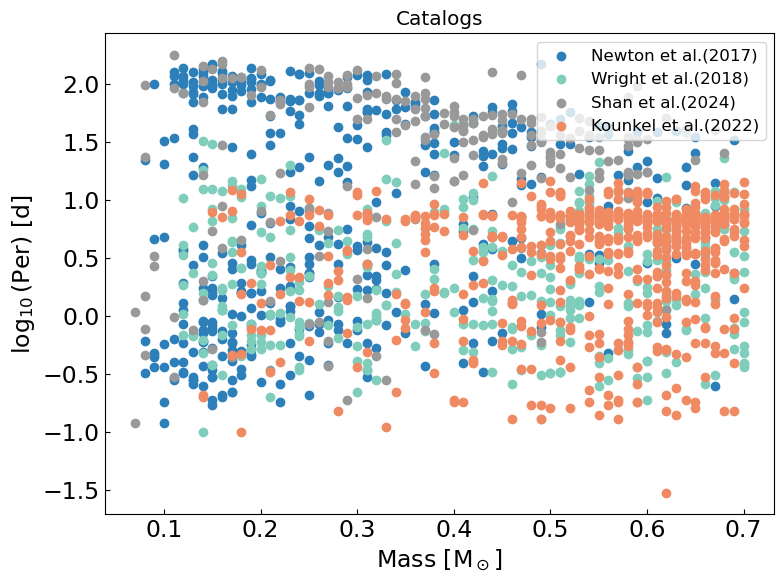

In [155]:
mask_newton = tbl['reference'] == 'Newton17'
mask_wright = tbl['reference'] == 'Wright'
mask_shan = tbl['reference'] == 'Shan'
mask_kounkel = tbl['reference'] == 'Kounkel'
plt.figure(figsize= (8,6))
plt.scatter(tbl['Mass'][mask_newton], np.log10(tbl['Per'][mask_newton]), color = '#2c7fb8', label = 'Newton et al.(2017)')
plt.scatter(tbl['Mass'][mask_wright], np.log10(tbl['Per'][mask_wright]), color = '#7fcdbb', label = 'Wright et al.(2018)')
plt.scatter(tbl['Mass'][mask_shan], np.log10(tbl['Per'][mask_shan]), color = '#999999', label = 'Shan et al.(2024)')
plt.scatter(tbl['Mass'][mask_kounkel], np.log10(tbl['Per'][mask_kounkel]), color = '#ef8a62', label = 'Kounkel et al.(2022)')
plt.xlabel(r'Mass [${\rm M _\odot}$]')
plt.ylabel(r'$\log_{10}(\mathrm{Per})\rm\ [d]$')
plt.title('Catalogs')
plt.legend(loc = 1, prop ={'size' : 12})
plt.tick_params(direction = 'in')
plt.tight_layout()
plt.savefig('../../plots/presentation/catalogs.png')
plt.show()

In [49]:
df = Table.read('../../catalogs/Combined/main_table_stars_with_rvs_n_errors.vot')
df

main_table_oid,main_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,ruwe_2,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_f,ipd_f,rv_robust_f,v_z,rv_amp_bin,abs_Mag,reMass,parallax_error,pmra_error,pmdec_error,radial_velocity_error_2,re_v_z,re_v_z_error,age_est
,,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,mas,mas / yr,mas / yr,km / s,,,
int32,int32,int64,float32,float64,float32,float64,float64,float64,str8,float32,str6,float32,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,int64,int64,int64,float64,int64,float64,float64,float32,float32,float32,float32,float64,float64,float64
1,1,2797745549200763520,0.44,4.79,0.45,4.06432,19.85704,1.554,Newton17,--,,--,1.5539801,55.223293,6,65.10811689055409,1044.6532,714.6345511276562,-761.9696674473287,10.908869,2.841834,6.9795403,3.902364,1,1,1,-49.80906158947147,1,9.97704446223993,0.51,0.041267276,0.046937995,0.041962754,3.902364,-49.77708211127059,1.3383402322111848,3.88791941110811
2,2,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,1.2977159,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,0,0,1,5.945556708153161,0,11.511992980482372,0.37,0.042310424,0.050504275,0.03205134,1.3245473,5.963363016706932,0.6523170468104627,0.13651482217685157
3,3,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,1.3819181,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,0,1,1,-13.192910481385432,0,9.602981629485956,0.55,0.03242564,0.02499476,0.02480002,0.21027899,-13.184130298114876,0.17113720641363064,0.5235301601216552
4,4,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,1.4623499,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1,0,1,5.498893225545977,0,10.609263983929928,0.45,0.031152343,0.033893805,0.02495529,0.75865865,5.5090020934913095,0.19293300511758874,0.1260775275725947
5,5,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,9.759859,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,1,0,1,5.019406935260629,0,10.635631700426684,0.45,0.21735539,0.24737093,0.21139015,1.9026254,5.030151829009192,0.4847795038958183,0.10515231455970787
6,8,374400957846408192,0.67,0.25,0.67,15.91794,40.85738,9.285,Newton17,--,,--,9.28536,18.88665,1,32.81128216805046,195.86702,115.99952125547368,-157.82267852136772,10.131072,1.7057018,-16.219627,1.7936746,1,0,1,-27.856391040024707,1,7.711188052692503,0.69,0.19001044,0.18309243,0.108840354,1.7936746,-27.834478698529296,1.1908822725878423,1.6903125209408714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,2194,2611163717366876544,0.55,1.6,0.47,342.58046,-7.08964,1.085,Wright,--,,--,1.0850837,0.68982315,0,68.93028118372844,148.73949,-106.57232266763265,103.75824912054978,9.132903,1.9275532,-5.9487762,0.15217462,0,0,1,7.815310863636578,0,8.324953349524073,0.63,0.019456035,0.022454634,0.022502972,0.15217462,7.815283614711265,0.019378722544213477,0.223856142726959


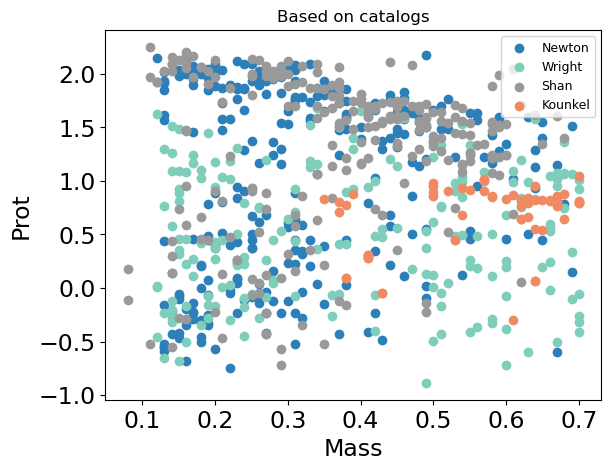

In [34]:
mask_newton = df['reference'] == 'Newton17'
mask_wright = df['reference'] == 'Wright'
mask_shan = df['reference'] == 'Shan'
mask_kounkel = df['reference'] == 'Kounkel'

plt.scatter(df['Mass'][mask_newton], np.log10(df['Per'][mask_newton]), color = '#2c7fb8', label = 'Newton')
plt.scatter(df['Mass'][mask_wright], np.log10(df['Per'][mask_wright]), color = '#7fcdbb', label = 'Wright')
plt.scatter(df['Mass'][mask_shan], np.log10(df['Per'][mask_shan]), color = '#999999', label = 'Shan')
plt.scatter(df['Mass'][mask_kounkel], np.log10(df['Per'][mask_kounkel]), color = '#ef8a62', label = 'Kounkel')
plt.xlabel('Mass')
plt.ylabel('Prot')
plt.title('Based on catalogs')
plt.legend(loc = 1, prop ={'size' : 9})
plt.show()

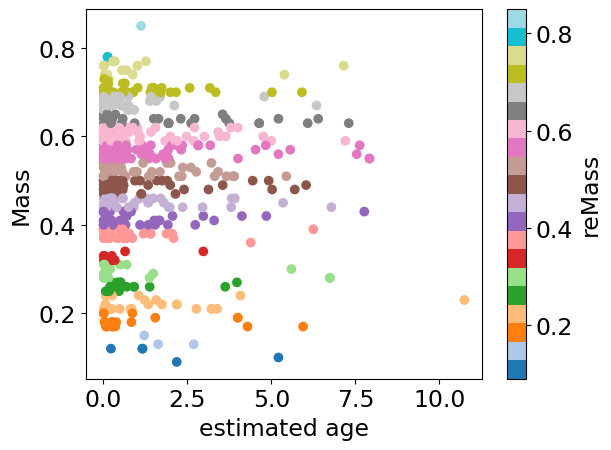

In [56]:
plt.scatter(df['age_est'], df['reMass'], c = df['reMass'], cmap = 'tab20')
plt.xlabel('estimated age')
plt.ylabel('Mass')
plt.colorbar(label='reMass')
plt.show()

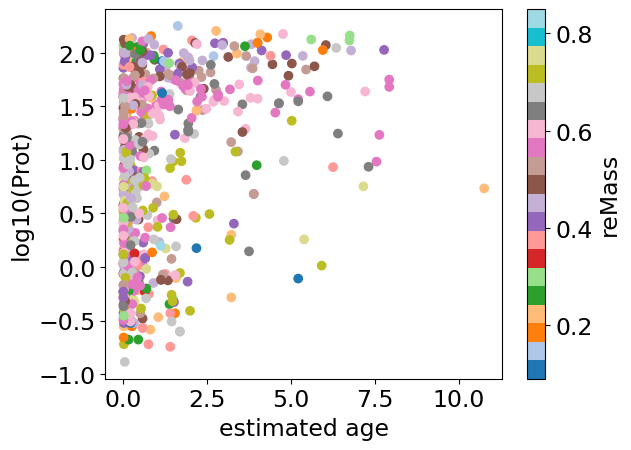

In [58]:
plt.scatter(df['age_est'], np.log10(df['Per']), c = df['reMass'], cmap = 'tab20')
plt.xlabel('estimated age')
plt.ylabel('log10(Prot)')
plt.colorbar(label='reMass')
plt.show()

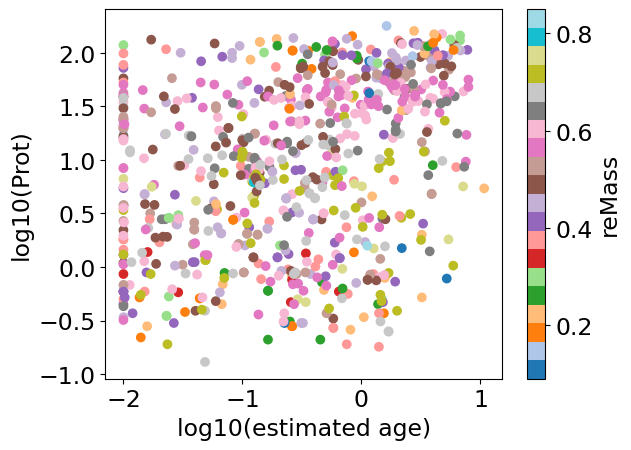

In [60]:
plt.scatter(np.log10(df['age_est']), np.log10(df['Per']), c = df['reMass'], cmap = 'tab20')
plt.xlabel('log10(estimated age)')
plt.ylabel('log10(Prot)')
plt.colorbar(label='reMass')
plt.show()

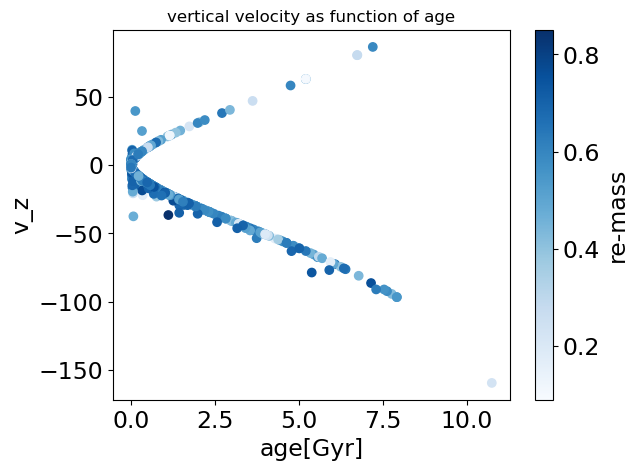

In [62]:
plt.scatter(df['age_est'], df['v_z'], c = df['reMass'], cmap = 'Blues')
plt.colorbar(label = 're-mass')
plt.xlabel('age[Gyr]')
plt.ylabel('v_z')
plt.title('vertical velocity as function of age')
plt.show()

In [67]:
mask1 = df['ruwe_f'] == 1
mask2 = df['ipd_f'] == 1
mask3 = df['rv_amp_bin'] == 1
mask_nonbinary = (df['ruwe_f'] + df['ipd_f'] + df['rv_amp_bin']) == 0

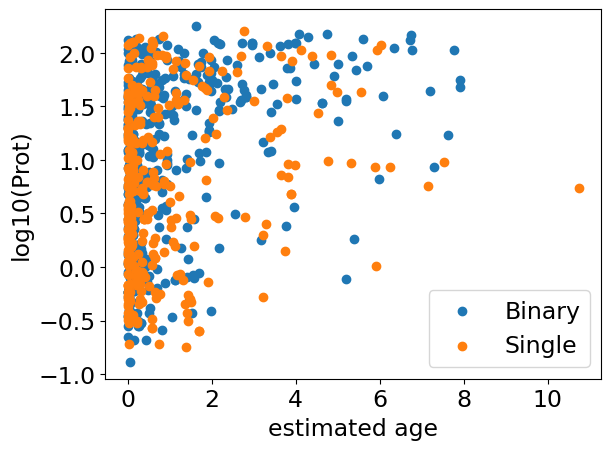

In [12]:
plt.scatter(df['age_est'][mask_nonbinary], np.log10(df['Per'][mask_nonbinary]), label = 'Binary')
plt.scatter(df['age_est'][~mask_nonbinary], np.log10(df['Per'][~mask_nonbinary]), label = 'Single')
plt.xlabel('estimated age')
plt.ylabel('log10(Prot)')
plt.legend()
plt.show()

In [145]:
df['source_id'][~mask_nonbinary], df['source_id'][mask_nonbinary]

(<MaskedColumn name='source_id' dtype='int64' length=342>
 2797745549200763520
  416158489625704320
 2779735823615714176
 2779735819320035840
  374400957846408192
    3179036008830848
  200296663143599104
 3409166991697595904
  261243245503357056
                 ...
 6794047652729201024
 1785074513721959552
 1950040638449191424
 6558208838138808576
 1893189736896880640
 1905055700744817024
 1930024819536623744
 2410011260521088512,
 <MaskedColumn name='source_id' dtype='int64' length=478>
 2859027409595355776
  218366758786141440
  476809509515283712
  177391907491420032
  179700710496485504
 3409711211681795584
  259731623173675904
  215412263665992448
  970354749937140736
                 ...
 1899944586584322944
 1975678603914495616
 1899315528493766528
 1934263333784036736
 2611163717366876544
 1934862945577481344
 1941126622803033984
 1942586980404421888)

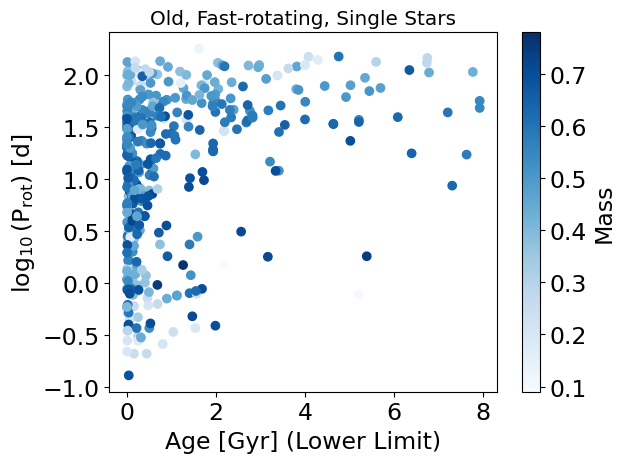

In [97]:
plt.scatter(df['age_est'][mask_nonbinary], np.log10(df['Per'][mask_nonbinary]), c = df['reMass'][mask_nonbinary], cmap = 'Blues')
plt.xlabel('Age [Gyr] (Lower Limit)')
plt.ylabel(r'$\log_{10}(\rm{P}_{\rm rot})$ [d]')
plt.colorbar(label = 'Mass')
plt.title('Old, Fast-rotating, Single Stars')
# plt.axhline(y = 0.7, color = 'red')
plt.tight_layout()

plt.savefig('../../plots/presentation/rotation_age.png')
plt.show()

In [151]:
## select stars with Prot less than 0.7
make_table = df[df['Per'] < 0.7]
# make_table.write('../../catalogs/Combined/single_fast_rotators.vot', format = 'votable', overwrite = True)